In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.font_manager as fm

In [4]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [5]:
company_info = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final.csv',encoding='cp949')
company_info_corp = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final+corp.csv',encoding='cp949')

In [6]:
company_info_corp.isnull().sum()

사업자등록번호      0
기업명          0
공기업구분        0
개인법인구분       0
본점지점구분       0
국외투자법인여부     0
벤처기업여부       0
상장코드         0
산업코드1        0
공공기관유형       0
중견기업보호여부     0
본점기업코드       0
설립일자         0
설립구분         0
국가명          0
직원수          0
폐업여부         0
산업코드 대분류     0
구글 검색량       0
설립일자(day)    0
회사명          0
sum_rlt      0
휴폐업유무        0
재무정보_분기      0
dtype: int64

# Feature Engineering

In [7]:
df = company_info.drop(columns=['사업자등록번호','기업명','설립일자','산업코드1','공기업구분','본점기업코드'])
df_corp = company_info_corp.drop(columns=['사업자등록번호','기업명','설립일자','산업코드1','공기업구분','본점기업코드'])

## StandardScaler + LabelEncoder

In [8]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [30]:
num_attribss = df[['직원수','설립일자(day)','구글 검색량']]
num_attribss_plus = df_corp[['직원수','설립일자(day)','구글 검색량','sum_rlt']]
cat_ord_attribs = df[['상장코드','벤처기업여부', '중견기업보호여부','국외투자법인여부']]
cat_all = df[['공공기관유형','설립구분','국가명','개인법인구분','본점지점구분','산업코드 대분류']]
cat_ord_attribs_plus = df_corp[['상장코드','벤처기업여부', '중견기업보호여부','국외투자법인여부']]
cat_all_plus = df_corp[['공공기관유형','설립구분','국가명','개인법인구분','본점지점구분','산업코드 대분류']]
y = company_info[['폐업여부']]
y_plus = company_info_corp[['폐업여부']]
# 변수별 타입 나누기

In [31]:
y_plus

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
14337,1
14338,1
14339,1
14340,1


## 스케일링

### StandardScaler

In [10]:
# 수치형 변수 스케일링
sta_scaler = StandardScaler()
sta_X_scale = sta_scaler.fit_transform(num_attribss)
sta_X_scale = pd.DataFrame(sta_X_scale, columns=num_attribss.columns)
sta_X_scale  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량
0,-0.071824,3.515949,-0.045666
1,-0.123865,1.242839,0.033135
2,0.617721,0.323263,-0.047537
3,0.136341,0.574683,-0.045253
4,-0.332029,0.450449,-0.047542
...,...,...,...
35716,-0.351545,-1.136054,-0.047550
35717,-0.208432,-1.360659,-0.047550
35718,-0.351545,-1.285626,-0.047550
35719,-0.351545,-1.472592,-0.044228


In [11]:
num_attribss_plus = num_attribss_plus.astype('float64')

In [12]:
# 수치형 변수 스케일링
sta_scaler_plus = StandardScaler()
sta_X_scale_plus = sta_scaler_plus.fit_transform(num_attribss_plus)
sta_X_scale_plus = pd.DataFrame(sta_X_scale_plus, columns=num_attribss_plus.columns)
sta_X_scale_plus.isnull().sum()  # 스케일링 데이터 프레임화

직원수          0
설립일자(day)    0
구글 검색량       0
sum_rlt      0
dtype: int64

## Oridinal Encoding

In [13]:
ord_encoder = OrdinalEncoder() #순서가 있는 카테고리형
X_ord = ord_encoder.fit_transform(cat_ord_attribs)
X_ord = pd.DataFrame(X_ord, columns= cat_ord_attribs.columns)
X_ord

,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
35716,0.0,0.0,0.0,0.0
35717,0.0,0.0,0.0,0.0
35718,0.0,0.0,0.0,0.0
35719,0.0,0.0,0.0,0.0


## Label Encoding

In [14]:
X_label = cat_all.copy()

In [15]:
lab_encoder = LabelEncoder()  #순서가 있는 카테고리형

In [16]:
for name in cat_all.columns:
    X_label[name] = lab_encoder.fit_transform(cat_all[name])

In [17]:
#X_label = X_label.astype('category')

## Oridinal Encoding

In [18]:
ord_encoder_plus = OrdinalEncoder() #순서가 있는 카테고리형
X_ord_plus = ord_encoder_plus.fit_transform(cat_ord_attribs_plus)
X_ord_plus = pd.DataFrame(X_ord_plus, columns= cat_ord_attribs_plus.columns)
X_ord_plus

,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
14337,0.0,1.0,0.0,0.0
14338,0.0,0.0,0.0,0.0
14339,0.0,0.0,0.0,0.0
14340,0.0,0.0,0.0,0.0


## Label Encoding

In [19]:
X_label_plus = cat_all_plus.copy()

In [20]:
lab_encoder_plus = LabelEncoder()  #순서가 있는 카테고리형

In [21]:
for name in cat_all_plus.columns:
    X_label_plus[name] = lab_encoder_plus.fit_transform(cat_all_plus[name])

X_label_plus

,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류
0,0,0,0,0,0,5
1,0,0,0,0,0,5
2,0,0,0,0,0,5
3,0,0,0,0,0,5
4,0,0,0,0,0,5
...,...,...,...,...,...,...
14337,0,0,0,0,0,16
14338,0,0,0,0,0,16
14339,0,0,0,0,1,5
14340,0,0,0,0,1,5


## 데이터 합치기

In [53]:
df_preprdcessed = pd.concat([sta_X_scale,X_label,X_ord], axis = 1)
df_preprdcessed

,직원수,설립일자(day),구글 검색량,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
0,-0.071824,3.515949,-0.045666,0,0,0,0,0,6,0.0,0.0,0.0,0.0
1,-0.123865,1.242839,0.033135,0,0,0,0,0,17,0.0,0.0,0.0,0.0
2,0.617721,0.323263,-0.047537,0,0,0,0,0,13,0.0,0.0,0.0,0.0
3,0.136341,0.574683,-0.045253,0,0,0,0,0,17,0.0,0.0,0.0,0.0
4,-0.332029,0.450449,-0.047542,0,0,0,0,0,6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,-1.136054,-0.047550,0,0,0,0,1,17,0.0,0.0,0.0,0.0
35717,-0.208432,-1.360659,-0.047550,0,0,0,0,1,17,0.0,0.0,0.0,0.0
35718,-0.351545,-1.285626,-0.047550,0,0,0,0,1,11,0.0,0.0,0.0,0.0
35719,-0.351545,-1.472592,-0.044228,0,0,0,0,0,16,0.0,0.0,0.0,0.0


In [22]:
df_preprdcessed_plus = pd.concat([sta_X_scale_plus,X_label_plus,X_ord_plus], axis = 1)
df_preprdcessed_plus

,직원수,설립일자(day),구글 검색량,sum_rlt,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
0,-0.194360,2.953956,-0.052631,-0.691818,0,0,0,0,0,5,0.0,0.0,0.0,0.0
1,-0.420968,0.025309,-0.054413,-0.277484,0,0,0,0,0,5,0.0,0.0,0.0,0.0
2,-0.420968,0.025309,-0.054413,-0.173901,0,0,0,0,0,5,0.0,0.0,0.0,0.0
3,-0.234016,0.361394,-0.054418,-0.691818,0,0,0,0,0,5,0.0,0.0,0.0,0.0
4,-0.234016,0.361394,-0.054418,-0.381068,0,0,0,0,0,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,-0.432299,-1.593779,-0.054197,0.344017,0,0,0,0,0,16,0.0,1.0,0.0,0.0
14338,-0.432299,-1.599889,-0.054197,3.451523,0,0,0,0,0,16,0.0,0.0,0.0,0.0
14339,-0.437964,-1.607175,-0.054197,-0.277484,0,0,0,0,1,5,0.0,0.0,0.0,0.0
14340,-0.437964,-1.607175,-0.054197,0.861935,0,0,0,0,1,5,0.0,0.0,0.0,0.0


In [80]:
df_preprdcessed_plus.isnull().sum()

직원수          0
설립일자(day)    0
구글 검색량       0
sum_rlt      0
공공기관유형       0
설립구분         0
국가명          0
개인법인구분       0
본점지점구분       0
산업코드 대분류     0
상장코드         0
벤처기업여부       0
중견기업보호여부     0
국외투자법인여부     0
dtype: int64

## 모델 평가 함수

In [23]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}")

# LightGBM

In [25]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_val, y_train, y_val = train_test_split(df_preprdcessed, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [59]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val)

In [60]:
train_data

In [33]:
y_plus

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
14337,1
14338,1
14339,1
14340,1


In [34]:
X_train_plus, X_val_plus, y_train_plus, y_val_plus = train_test_split(df_preprdcessed_plus, y_plus, test_size=0.2, shuffle=True, stratify=y_plus, random_state=42)
X_train_plus.shape, X_val_plus.shape, y_train_plus.shape, y_val_plus.shape

((11473, 14), (2869, 14), (11473, 1), (2869, 1))

In [35]:
train_data_plus = lgb.Dataset(X_train_plus, label=y_train_plus)
test_data_plus = lgb.Dataset(X_val_plus, label=y_val_plus)

In [36]:
train_data_plus

In [39]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": ['auc',"binary_logloss"],
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}



In [65]:
num_round = 500

model = lgb.train(params, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=50)

C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.800102	valid_0's binary_logloss: 0.470703
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.80135	valid_0's binary_logloss: 0.459072
[3]	valid_0's auc: 0.802468	valid_0's binary_logloss: 0.449955
[4]	valid_0's auc: 0.80456	valid_0's binary_logloss: 0.441606
[5]	valid_0's auc: 0.805603	valid_0's binary_logloss: 0.434374
[6]	valid_0's auc: 0.817738	valid_0's binary_logloss: 0.423141
[7]	valid_0's auc: 0.83411	valid_0's binary_logloss: 0.412548
[8]	valid_0's auc: 0.838649	valid_0's binary_logloss: 0.403229
[9]	valid_0's auc: 0.841987	valid_0's binary_logloss: 0.395045
[10]	valid_0's auc: 0.847874	valid_0's binary_logloss: 0.387766
[11]	valid_0's auc: 0.850285	valid_0's binary_logloss: 0.381558
[12]	valid_0's auc: 0.852045	valid_0's binary_logloss: 0.377401
[13]	valid_0's auc: 0.858932	valid_0's binary_logloss: 0.373642
[14]	valid_0's auc: 0.862076	valid_0's binary_logloss: 0.367698
[15]	valid_0's auc: 0.863794	valid_0's binary_logloss: 

In [66]:
# 예측
preds_proba = model.predict(X_val)
preds = np.where(preds_proba > 0.5, 1, 0)


In [67]:
get_clf_eval(y_val, preds)

오차 행렬
[[5725   72]
 [ 380  968]]
정확도: 0.9367, 정밀도: 0.9308, 재현율: 0.7181, F1: 0.8107


In [68]:
X_train

,직원수,설립일자(day),구글 검색량,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
9300,0.455093,0.525235,-0.047530,0,0,0,0,0,17,0.0,0.0,0.0,0.0
31911,-0.345040,-0.708247,-0.047246,0,0,0,0,0,8,0.0,0.0,0.0,0.0
1926,0.409557,0.453401,-0.047367,0,0,0,0,0,15,0.0,0.0,0.0,0.0
26936,-0.351545,-1.181811,-0.047550,0,0,0,0,0,8,0.0,0.0,0.0,0.0
31896,-0.299504,-0.705048,-0.047246,0,0,0,0,0,16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,0.819380,1.543460,-0.047537,0,0,0,0,0,17,0.0,1.0,0.0,0.0
9048,0.123330,0.970755,-0.033200,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4468,-0.058813,0.331381,-0.046852,0,0,0,0,0,17,0.0,0.0,0.0,0.0
11289,-0.130370,0.057821,-0.046693,0,0,0,0,0,17,0.0,0.0,0.0,0.0


In [69]:
X_train_plus

,직원수,설립일자(day),구글 검색량,sum_rlt,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
9300,-0.432299,-0.599388,-0.043839,-0.795402,0,0,0,0,0,17,0.0,0.0,0.0,0.0
31911,NaN,NaN,NaN,NaN,0,0,0,0,0,8,0.0,0.0,0.0,0.0
1926,-0.018738,0.181600,-0.054333,0.136850,0,0,0,0,0,15,0.0,0.0,0.0,0.0
26936,NaN,NaN,NaN,NaN,0,0,0,0,0,8,0.0,0.0,0.0,0.0
31896,NaN,NaN,NaN,NaN,0,0,0,0,0,16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,-0.115046,-0.498092,-0.054418,-0.691818,0,0,0,0,0,17,0.0,1.0,0.0,0.0
9048,-0.432299,-0.601503,-0.054175,-0.795402,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4468,-0.154703,0.137416,-0.054421,-0.588235,0,0,0,0,0,17,0.0,0.0,0.0,0.0
11289,-0.437964,-0.795164,-0.053984,-0.795402,0,0,0,0,0,17,0.0,0.0,0.0,0.0


# 모델 튜닝

In [166]:
tuned_params = {}
tuned_params['learning_rate'] = 0.003
tuned_params['boosting_type'] = 'gbdt'
tuned_params['objective'] = 'binary'
tuned_params['metric'] = 'binary_logloss'
tuned_params['sub_feature'] = 0.5
tuned_params['num_leaves'] = 10
tuned_params['min_data'] = 50
tuned_params['max_depth'] = 10

In [167]:
lgb_clf = lgb.LGBMClassifier()

In [168]:
lgb_clf.fit(X_train, np.ravel(y_train))

LGBMClassifier()

In [169]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
lgb_tuned=lgb.LGBMClassifier()

parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

lgb_tuned=RandomizedSearchCV(lgb_tuned,parameters,scoring='f1',n_iter=100)
lgb_tuned.fit(X=X_train, y=np.ravel(y_train))

print(lgb_tuned.best_params_)
predicted=lgb_tuned.predict(X_val)

print('Classification of the result is:')
print(get_clf_eval(y_val, predicted))

{'reg_alpha': 0.01, 'num_leaves': 100, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.2}
Classification of the result is:
오차 행렬
[[5717   80]
 [ 377  971]]
정확도: 0.9360, 정밀도: 0.9239, 재현율: 0.7203, F1: 0.8095
None


In [40]:
tuned_params = {
    "max_bin": 512,
    "learning_rate": 0.2,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": ['auc',"binary_logloss"],
    "num_leaves": 100,
    "max_depth" : 5,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

In [32]:

num_round = 500

model_tuned = lgb.train(tuned_params, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=50)

NameError: name 'train_data' is not defined

In [175]:
# 예측
preds_proba_tuned = model_tuned.predict(X_val)
preds_tuned = np.where(preds_proba_tuned > 0.5, 1, 0)


In [176]:
get_clf_eval(y_val, preds_tuned)

오차 행렬
[[5715   82]
 [ 358  990]]
정확도: 0.9384, 정밀도: 0.9235, 재현율: 0.7344, F1: 0.8182


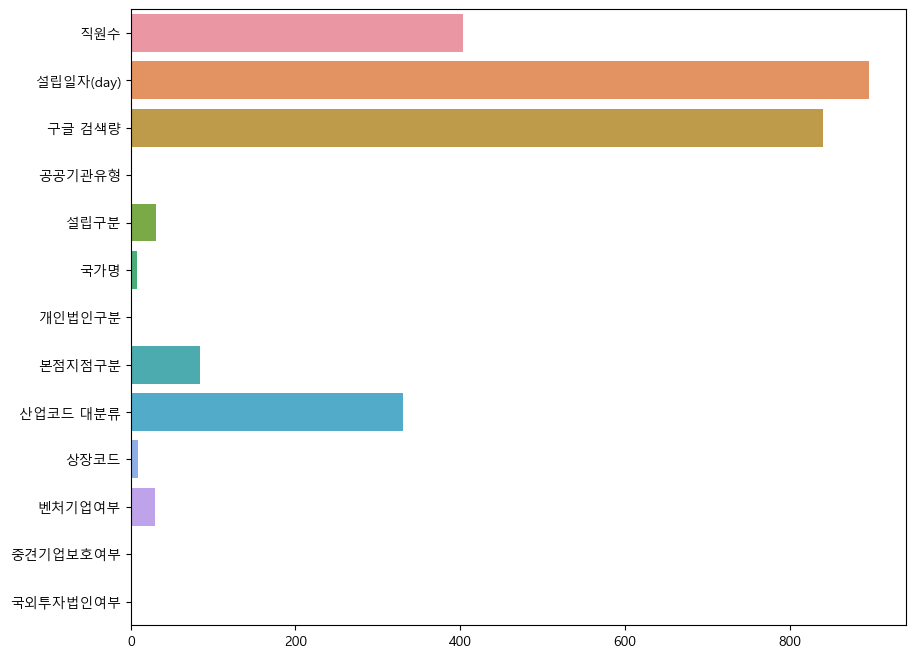

In [184]:
plt.figure(figsize= (10,8))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train.columns, x =model_tuned.feature_importance())
plt.show()

# corp

In [37]:
df_preprdcessed_plus

,직원수,설립일자(day),구글 검색량,sum_rlt,공공기관유형,설립구분,국가명,개인법인구분,본점지점구분,산업코드 대분류,상장코드,벤처기업여부,중견기업보호여부,국외투자법인여부
0,-0.194360,2.953956,-0.052631,-0.691818,0,0,0,0,0,5,0.0,0.0,0.0,0.0
1,-0.420968,0.025309,-0.054413,-0.277484,0,0,0,0,0,5,0.0,0.0,0.0,0.0
2,-0.420968,0.025309,-0.054413,-0.173901,0,0,0,0,0,5,0.0,0.0,0.0,0.0
3,-0.234016,0.361394,-0.054418,-0.691818,0,0,0,0,0,5,0.0,0.0,0.0,0.0
4,-0.234016,0.361394,-0.054418,-0.381068,0,0,0,0,0,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,-0.432299,-1.593779,-0.054197,0.344017,0,0,0,0,0,16,0.0,1.0,0.0,0.0
14338,-0.432299,-1.599889,-0.054197,3.451523,0,0,0,0,0,16,0.0,0.0,0.0,0.0
14339,-0.437964,-1.607175,-0.054197,-0.277484,0,0,0,0,1,5,0.0,0.0,0.0,0.0
14340,-0.437964,-1.607175,-0.054197,0.861935,0,0,0,0,1,5,0.0,0.0,0.0,0.0


In [43]:
num_round = 500
model_plus = lgb.train(params, train_data_plus, num_round, valid_sets=[test_data_plus], early_stopping_rounds=50)

C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.830256	valid_0's binary_logloss: 0.245651
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.842879	valid_0's binary_logloss: 0.235754
[3]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.227335
[4]	valid_0's auc: 0.846709	valid_0's binary_logloss: 0.220601
[5]	valid_0's auc: 0.854753	valid_0's binary_logloss: 0.215687
[6]	valid_0's auc: 0.854684	valid_0's binary_logloss: 0.210514
[7]	valid_0's auc: 0.860469	valid_0's binary_logloss: 0.203983
[8]	valid_0's auc: 0.861074	valid_0's binary_logloss: 0.19967
[9]	valid_0's auc: 0.862972	valid_0's binary_logloss: 0.194591
[10]	valid_0's auc: 0.863922	valid_0's binary_logloss: 0.189906
[11]	valid_0's auc: 0.891552	valid_0's binary_logloss: 0.186371
[12]	valid_0's auc: 0.891952	valid_0's binary_logloss: 0.183296
[13]	valid_0's auc: 0.891473	valid_0's binary_logloss: 0.180048
[14]	valid_0's auc: 0.897976	valid_0's binary_logloss: 0.177343
[15]	valid_0's auc: 0.897453	valid_0's binary_logloss

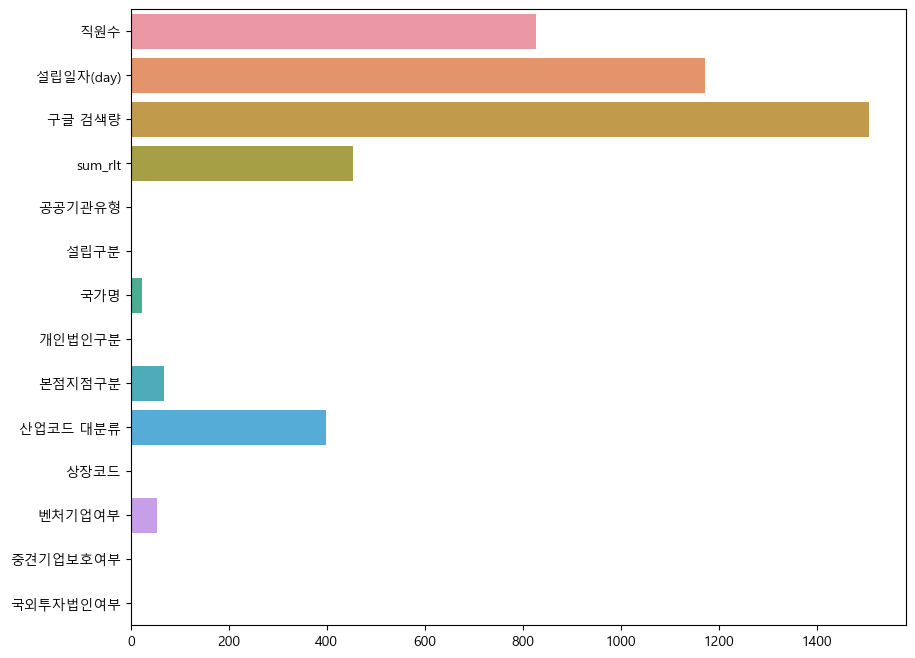

In [44]:
plt.figure(figsize= (10,8))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train_plus.columns, x =model_plus.feature_importance())
plt.show()

In [45]:
tuned_params = {
    "max_bin": 512,
    "learning_rate": 0.2,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": ['auc',"binary_logloss"],
    "num_leaves": 100,
    "max_depth" : 5,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

num_round = 500

model_tuned_plus = lgb.train(tuned_params, train_data_plus, num_round, valid_sets=[test_data_plus])

[1]	valid_0's auc: 0.878379	valid_0's binary_logloss: 0.209156
[2]	valid_0's auc: 0.900197	valid_0's binary_logloss: 0.181515
[3]	valid_0's auc: 0.905684	valid_0's binary_logloss: 0.168308
[4]	valid_0's auc: 0.915377	valid_0's binary_logloss: 0.15883
[5]	valid_0's auc: 0.921491	valid_0's binary_logloss: 0.15104
[6]	valid_0's auc: 0.926506	valid_0's binary_logloss: 0.144554
[7]	valid_0's auc: 0.931121	valid_0's binary_logloss: 0.136675
[8]	valid_0's auc: 0.932516	valid_0's binary_logloss: 0.132459
[9]	valid_0's auc: 0.934552	valid_0's binary_logloss: 0.127213
[10]	valid_0's auc: 0.935313	valid_0's binary_logloss: 0.124618
[11]	valid_0's auc: 0.93888	valid_0's binary_logloss: 0.123134
[12]	valid_0's auc: 0.940555	valid_0's binary_logloss: 0.118878
[13]	valid_0's auc: 0.940563	valid_0's binary_logloss: 0.116311
[14]	valid_0's auc: 0.942802	valid_0's binary_logloss: 0.114025
[15]	valid_0's auc: 0.949738	valid_0's binary_logloss: 0.108645
[16]	valid_0's auc: 0.94995	valid_0's binary_logloss

In [46]:
# 예측
preds_proba_tuned_plus = model_tuned_plus.predict(X_val_plus)
preds_tuned_plus = np.where(preds_proba_tuned_plus > 0.5, 1, 0)


In [47]:
get_clf_eval(y_val_plus, preds_tuned_plus)

오차 행렬
[[2658    3]
 [  33  175]]
정확도: 0.9875, 정밀도: 0.9831, 재현율: 0.8413, F1: 0.9067


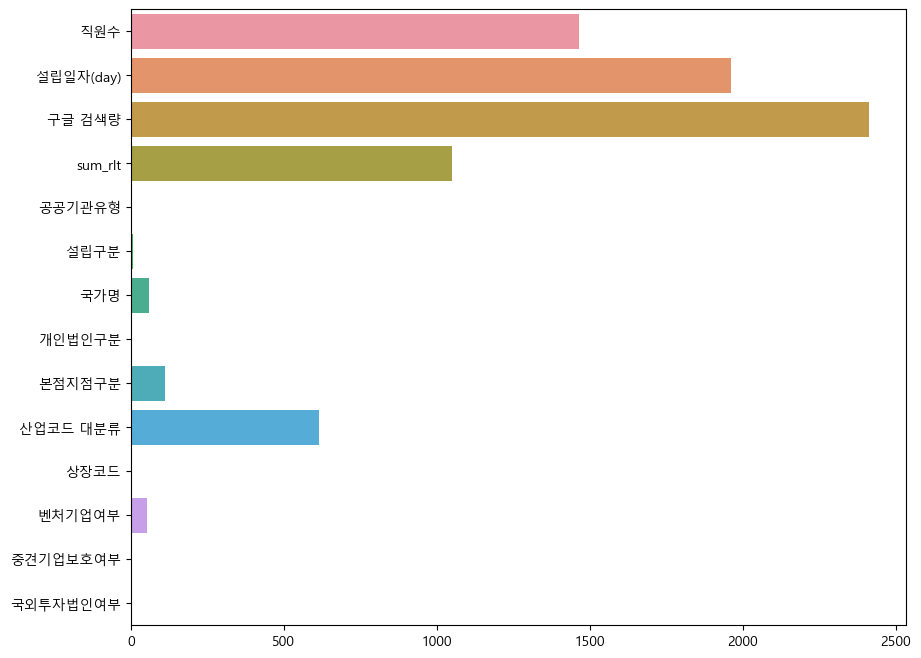

In [49]:
plt.figure(figsize= (10,8))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train_plus.columns, x =model_tuned_plus.feature_importance())
plt.show()

# Shap

In [51]:
import shap

In [178]:
# print the JS visualization code to the notebook
shap.initjs()

In [179]:
explainer = shap.TreeExplainer(model_tuned)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [180]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_val.iloc[0,:])

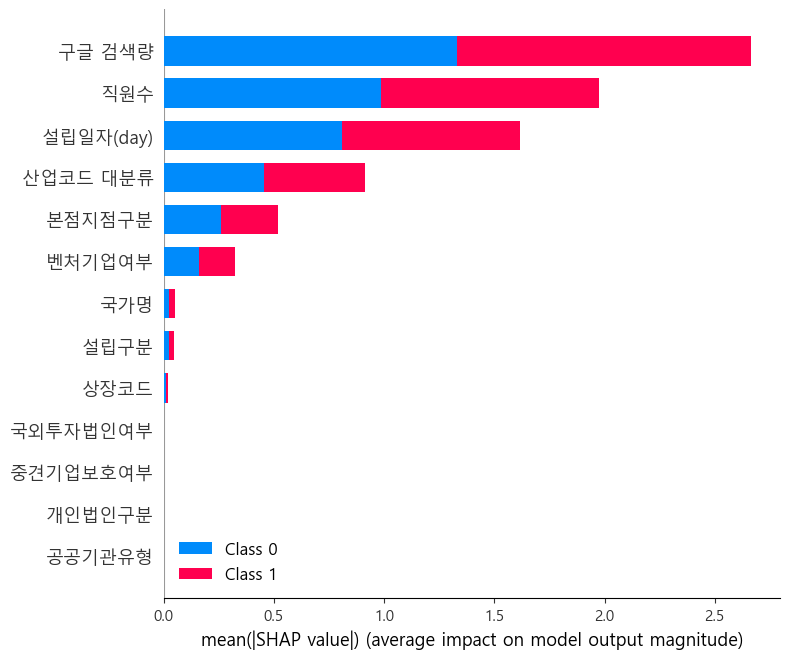

In [181]:
# summary
shap.summary_plot(shap_values, X_val)

In [52]:
# print the JS visualization code to the notebook
shap.initjs()

In [53]:
explainer_plus = shap.TreeExplainer(model_tuned_plus)
shap_values = explainer_plus.shap_values(X_train_plus)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [56]:
shap.force_plot(explainer_plus.expected_value[1], shap_values[1][0,:], X_val_plus.iloc[0,:])

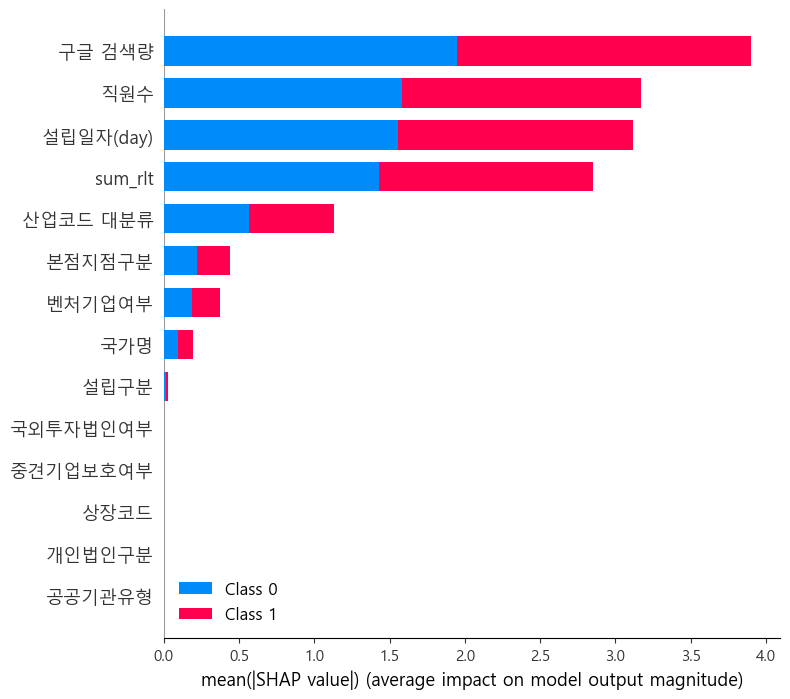

In [58]:
# summary
shap.summary_plot(shap_values, X_val_plus)

# Lime

In [34]:
pom = [(-0.319019,-1.264962,-0.047521,6,0,0,0,0,0,0,1,0,1)]
pieceofmove = pd.DataFrame(pom,columns=df_preprdcessed.columns)
pieceofmove

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,-0.319019,-1.264962,-0.047521,6,0,0,0,0,0,0,1,0,1


피스오브무브 비재무 정보

{'개인법인구분' : 1, '본점지점구분' : 1 , '국외투자법인여부' : 0,'벤처기업여부' : 0, '상장코드':0 , '공공기관유형' : 0,'중견기업보호여부' : 0, '본점기업코드' : 0,'설립구분' : 1,
 '국가명' : 0, '직원수': 5,'폐업여부' : 0,'산업코드 대분류':'도매 및 소매업','구글 검색량' : 1040,'설립일자' : 1216}

In [35]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = X_train.columns.tolist(), kernel_width=3)

In [36]:
predict_fn = lambda x: lgb_clf.predict_proba(x).astype(float)

In [37]:
chosen = pieceofmove.iloc[0]

In [185]:
exp = explainer.explain_instance(chosen, predict_fn,num_features=13)
exp.show_in_notebook(show_all=False)

AttributeError: 'Tree' object has no attribute 'explain_instance'

In [39]:
chosen

직원수         -0.319019
설립일자(day)   -1.264962
구글 검색량      -0.047521
산업코드 대분류     6.000000
상장코드         0.000000
벤처기업여부       0.000000
공공기관유형       0.000000
중견기업보호여부     0.000000
국가명          0.000000
국외투자법인여부     0.000000
본점지점구분       1.000000
본점기업코드       0.000000
설립구분         1.000000
Name: 0, dtype: float64